### Installing PyDrive

In [0]:
!pip install -U -q PyDrive



In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



# After a specific amount of time Pydrive logs out, the enxt function checks for that and if it has happend trys log in again
# you will not to log in to your account just the first time, the next times it will be automatic, we will use this function later on.
def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


## Importing modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [193]:

# this will just check if we are logged out it logs in
authorizeIfLoggedOut()

file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file1 in file_list_GDrive:  
    if "Data-Driven-Building-Simulation" in file1['title']:
        Folder_ID_Data_Driven_Building_Simulation= file1['id']

print(Folder_ID_Data_Driven_Building_Simulation)

file_list_Data_Driven_Building_Simulation = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data_Driven_Building_Simulation}).GetList()

for file2 in file_list_Data_Driven_Building_Simulation:  
    if "Data" in file2['title']:
        Folder_ID_Data= file2['id']
        
for file4 in file_list_Data_Driven_Building_Simulation:
  
    if "Figures" in file4['title']:
        Folder_ID_Figures= file4['id']        
        
        
file_list_Data = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data}).GetList()

for file3 in file_list_Data:  
    if "energydata_complete.csv" in file3['title']:
        print "energydata_complete.csv exists"
        ID_energydata_complete_gen= file3['id']
        file_energydata_complete_gen = drive.CreateFile({'id': ID_energydata_complete_gen})
        file_energydata_complete_gen.GetContentFile('energydata_complete.csv') 
    
  

1Sv0oZJuJw0gwfssnpQIuJ15x3lgfWoGS
energydata_complete.csv exists


# Importing datasets

### Creating the path for our "energy_complete.csv" to be imported

In [0]:
joinedDF_FileName = "energydata_complete.csv"



 ## Converting the index to real timestamps, so that the time indexes will be ment properly as time and not only as numbers
 


In [195]:
DF_main = pd.read_csv(joinedDF_FileName, sep =",", index_col = 0)
oldIndex_DF_main = DF_main.index
newIndex_DF_main = pd.to_datetime(oldIndex_DF_main) # hey computer, the indexes are TIME, not random numbers
DF_main.index = newIndex_DF_main
DF_main

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702


In [196]:
DF_main_clean = DF_main.dropna() #deleting all NaN values, clean now
DF_main_clean.tail()



,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


## Columns for time-related features

We create a column which tells us the corresponding hour of the day for each row


In [197]:
DF_main_clean.loc[:,"hour"]=DF_main_clean.index.hour  #adding a column for corresponding hours 
DF_main_clean.head(30)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,17
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,18
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,18
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,18


We create 2 columns that represent the time as a continuous feature, thanks to SIN and COS

In [198]:
DF_main_clean.loc[:,"sin(hour)"] = np.sin(DF_main_clean.index.hour*2*np.pi/24) # i add a column where time is continuous (from 1 to -1 and again 1)
DF_main_clean.loc[:,"cos(hour)"] = np.cos(DF_main_clean.index.hour*2*np.pi/24) # another column, with cosin

DF_main_clean.head(30) #look: 6.123234e-17 is zero!


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour)
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17,-0.965926,-2.588190e-01
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17,-0.965926,-2.588190e-01
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17,-0.965926,-2.588190e-01
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17,-0.965926,-2.588190e-01
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,-0.965926,-2.588190e-01
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,17,-0.965926,-2.588190e-01
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,18,-1.000000,-1.836970e-16
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,18,-1.000000,-1.836970e-16
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,18,-1.000000,-1.836970e-16


Adding other columns that, for each row, will tell us the corresponding day of the week (from 1 to 7), month of the year (from 1 to 12), and week of the year (from 1 to 52)

In [199]:
DF_main_clean.loc[:,"month"] = DF_main_clean.index.month  #adding a column for the months
DF_main_clean.loc[:,"dayOfWeek"]=DF_main_clean.index.dayofweek
DF_main_clean.loc[:,"weekOfYear"] = DF_main_clean.index.week
DF_main_clean.tail(52)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-27 09:30:00,50,0,23.600000,47.200000,24.452857,43.750000,26.100000,40.466667,24.390000,43.500000,22.500000,52.500000,21.600000,3.556667,23.790000,42.500000,23.890000,48.000000,22.890000,46.500000,15.700000,756.150000,80.000000,2.000000,61.000000,12.200000,31.845927,31.845927,9,7.071068e-01,-7.071068e-01,5,4,21
2016-05-27 09:40:00,580,0,23.633333,47.226667,24.814000,43.472000,26.166667,40.500000,24.500000,43.500000,22.500000,52.433333,22.096667,1.696667,23.790000,42.500000,23.890000,48.000000,22.890000,46.433333,15.900000,756.166667,79.333333,1.666667,61.000000,12.266667,27.740214,27.740214,9,7.071068e-01,-7.071068e-01,5,4,21
2016-05-27 09:50:00,660,0,23.760000,47.693333,25.497143,42.595714,26.033333,40.693333,24.500000,43.560000,22.500000,52.400000,22.623333,1.096667,23.790000,42.551429,23.823333,47.933333,22.890000,46.290000,16.100000,756.183333,78.666667,1.333333,61.000000,12.333333,4.105907,4.105907,9,7.071068e-01,-7.071068e-01,5,4,21
2016-05-27 10:00:00,300,0,23.790000,47.863333,25.934000,41.754000,26.066667,41.566667,24.463333,43.700000,22.500000,52.400000,23.166667,1.000000,23.790000,42.612000,23.890000,48.000000,22.890000,46.290000,16.300000,756.200000,78.000000,1.000000,61.000000,12.400000,1.674413,1.674413,10,5.000000e-01,-8.660254e-01,5,4,21
2016-05-27 10:10:00,260,0,23.790000,47.863333,26.295714,41.724286,26.326667,42.360000,24.390000,43.833333,22.500000,52.433333,23.293333,1.000000,23.790000,42.725714,23.823333,47.933333,22.890000,46.260000,16.616667,756.200000,76.833333,1.166667,61.333333,12.466667,26.548729,26.548729,10,5.000000e-01,-8.660254e-01,5,4,21
2016-05-27 10:20:00,290,0,23.790000,48.126667,26.540000,41.296000,26.763333,43.096667,24.390000,44.066667,22.566667,52.500000,23.226667,1.000000,23.790000,42.834000,23.790000,48.030000,22.917500,46.200000,16.933333,756.200000,75.666667,1.333333,61.666667,12.533333,29.201292,29.201292,10,5.000000e-01,-8.660254e-01,5,4,21
2016-05-27 10:30:00,240,0,23.790000,48.260000,26.725714,40.821429,27.072500,43.822500,24.390000,44.260000,22.500000,52.530000,22.960000,1.000000,23.790000,42.914286,23.790000,48.090000,22.926667,46.200000,17.250000,756.200000,74.500000,1.500000,62.000000,12.600000,24.261825,24.261825,10,5.000000e-01,-8.660254e-01,5,4,21
2016-05-27 10:40:00,240,0,23.890000,48.400000,26.890000,40.514000,27.326667,44.000000,24.390000,44.400000,22.500000,52.590000,23.166667,1.000000,23.790000,43.000000,23.790000,48.200000,23.000000,46.163333,17.566667,756.200000,73.333333,1.666667,62.333333,12.666667,25.439580,25.439580,10,5.000000e-01,-8.660254e-01,5,4,21
2016-05-27 10:50:00,180,0,23.963333,48.326667,26.890000,39.962857,27.533333,43.766667,24.390000,44.400000,22.500000,52.590000,23.426667,1.000000,23.790000,43.000000,23.790000,48.222500,23.000000,46.163333,17.883333,756.200000,72.166667,1.833333,62.666667,12.733333,6.194314,6.194314,10,5.000000e-01,-8.660254e-01,5,4,21


We create a **function** that, for each row, will give to a flag variable "weekendLabel" the value of 1 in case that row corresponds to a weekend day.
Then we create a similar function that, for each row, will give to a flag variable "workingHourLabel" the value of 1 in case that row corresponds to a working hour.


In [0]:
def WeekendDetector(day):
    if (day == 5 or day==6):
        weekendLabel = 1
    else:
        weekendLabel = 0
    return weekendLabel        # function: if it's weekend, flag = 1

def workingHourDetector(hour):
    if (hour>=9 and hour <= 19):
        workingHourLabel = 1
    else:
        workingHourLabel = 0
    return workingHourLabel    # if time is from 9 am to 7 pm, people are working! flag = 1

We can now apply these functions on the corresponding colums, which are created right now:

In [201]:
DF_main_clean.loc[:,"weekendLabel"] = DF_main_clean.loc[:,"dayOfWeek"].apply(WeekendDetector)  # apply functions above
DF_main_clean.loc[:,"WorkingHourLabel"] = DF_main_clean.loc[:,"hour"].apply(workingHourDetector)
DF_main_clean.head(30)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17,-0.965926,-2.588190e-01,1,0,2,0,1
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17,-0.965926,-2.588190e-01,1,0,2,0,1
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17,-0.965926,-2.588190e-01,1,0,2,0,1
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17,-0.965926,-2.588190e-01,1,0,2,0,1
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,-0.965926,-2.588190e-01,1,0,2,0,1
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,17,-0.965926,-2.588190e-01,1,0,2,0,1
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,18,-1.000000,-1.836970e-16,1,0,2,0,1
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,18,-1.000000,-1.836970e-16,1,0,2,0,1
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,18,-1.000000,-1.836970e-16,1,0,2,0,1


Thanks to the function **range(start, end, step)** we can build a script that creates columns of lagged parameters.
First we create this kind script valid only for one single column "T1":

In [202]:
# first let's do this using a for to lag temperature for 6 hours

lag_start = 1
lag_end = 3
lag_interval = 1 

columnName = "T1"
inputDF = DF_main_clean
for i in range(lag_start,lag_end+1, lag_interval):  # "lag_end+1" because otherwise the vector "range" would be only [1,2]!
    new_column_name = columnName+" -"+str(i)+"0 min"
    print new_column_name
    inputDF.loc[:,new_column_name] = inputDF.loc[:,columnName].shift(i)
    inputDF.dropna(inplace=True)
    
inputDF.head()   # i create 3 new columns in a single step, each one shifted by 10 minutes and then cleaned from void spaces!


T1 -10 min
T1 -20 min
T1 -30 min


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,T1 -10 min,T1 -20 min,T1 -30 min
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.2000,18.1,48.59,17.0,45.29,5.900000,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,18,-1.0,-1.836970e-16,1,0,2,0,1,19.890000,19.890000,19.890000
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.73,44.900000,18.89,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.2000,18.1,48.59,17.0,45.29,5.916667,734.166667,91.833333,5.166667,40.0,4.683333,33.039890,33.039890,18,-1.0,-1.836970e-16,1,0,2,0,1,19.890000,19.890000,19.890000
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.73,44.790000,18.89,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.4000,18.1,48.59,17.0,45.29,5.933333,734.233333,91.666667,5.333333,40.0,4.666667,31.455702,31.455702,18,-1.0,-1.836970e-16,1,0,2,0,1,19.856667,19.890000,19.890000
2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.79,44.863333,18.89,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.5000,18.1,48.59,17.0,45.29,5.950000,734.300000,91.500000,5.500000,40.0,4.650000,3.089314,3.089314,18,-1.0,-1.836970e-16,1,0,2,0,1,19.790000,19.856667,19.890000
2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,17.100000,55.000000,6.190000,87.866667,17.247500,42.7175,18.1,48.59,17.0,45.29,5.966667,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,18,-1.0,-1.836970e-16,1,0,2,0,1,19.856667,19.790000,19.856667


Now we create a **function** "lag_gen_feature" which will be able to **apply** the same type of script that we have above for **all the columns we want**

In [0]:
def lag_gen_feature(inputDF,columnName,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1, lag_interval):
        new_column_name = columnName+" -"+str(i)+"0 min"
        if new_column_name in inputDF.columns:
            pass
        else:
            print new_column_name
            inputDF.loc[:,new_column_name] = inputDF.loc[:,columnName].shift(i)
            inputDF.dropna(inplace=True)
    return inputDF
# creating the same type of function, valid for everything

    

In [204]:
DF_main_clean = lag_gen_feature(DF_main_clean,"RH_1",6,6,1) # apply the function above to relative humidity of room 1: new colum lagged 1 hour
DF_main_clean = lag_gen_feature(DF_main_clean,"Windspeed",6,6,1) # apply the function above to Windspeed: new colum lagged 1 hour
DF_main_clean.head()




RH_1 -60 min
Windspeed -60 min


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,T1 -10 min,T1 -20 min,T1 -30 min,RH_1 -60 min,Windspeed -60 min
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 20:00:00,80,30,20.890000,51.193333,20.20,46.330000,20.200000,48.193333,18.963333,48.630000,17.200000,57.060000,5.333333,86.760000,17.666667,43.160000,18.533333,50.200000,16.89,45.200000,6.0,735.200000,88.000000,6.0,40.0,4.100000,19.001759,19.001759,20,-0.866025,0.5,1,0,2,0,0,20.856667,20.730000,20.566667,48.000000,6.0
2016-01-11 20:10:00,140,40,20.890000,49.800000,20.20,46.026667,20.166667,47.633333,19.033333,49.500000,17.593333,70.726667,5.333333,87.463333,17.600000,42.693333,18.666667,50.260000,16.89,45.200000,6.0,735.233333,87.833333,6.0,40.0,4.066667,38.872261,38.872261,20,-0.866025,0.5,1,0,2,0,0,20.890000,20.856667,20.730000,52.726667,6.0
2016-01-11 20:20:00,120,20,20.890000,48.433333,20.20,45.722500,20.166667,47.300000,19.175000,49.947500,18.066667,79.000000,5.466667,87.530000,17.600000,42.333333,18.730000,50.230000,16.89,45.126667,6.0,735.266667,87.666667,6.0,40.0,4.033333,46.735262,46.735262,20,-0.866025,0.5,1,0,2,0,0,20.890000,20.890000,20.856667,55.893333,6.0
2016-01-11 20:30:00,190,40,20.963333,47.633333,20.26,45.530000,20.200000,47.026667,19.260000,49.696667,17.666667,79.730000,5.500000,86.956667,17.533333,42.066667,18.856667,50.290000,16.89,45.126667,6.0,735.300000,87.500000,6.0,40.0,4.000000,10.607126,10.607126,20,-0.866025,0.5,1,0,2,0,0,20.890000,20.890000,20.890000,53.893333,6.0
2016-01-11 20:40:00,110,40,21.033333,47.063333,20.29,45.223333,20.260000,46.826667,19.323333,49.166667,17.600000,79.256667,5.560000,86.563333,17.633333,43.633333,18.890000,50.163333,16.89,45.060000,6.0,735.333333,87.333333,6.0,40.0,3.966667,32.583688,32.583688,20,-0.866025,0.5,1,0,2,0,0,20.963333,20.890000,20.890000,52.660000,6.0


In [0]:
DF_joined_WithGeneratedFeatures = DF_main_clean # changing name
FileName_DF_joined_WithGeneratedFeatures = "Belgium_DF_joined_WithGeneratedFeatures.csv" 
DF_joined_WithGeneratedFeatures.to_csv(FileName_DF_joined_WithGeneratedFeatures)


In [0]:
CompleteDF_metaData = {'title' : FileName_DF_joined_WithGeneratedFeatures,"parents": [{"kind": "drive#fileLink", "id": Folder_ID_Data}] }
CompleteDF_File = drive.CreateFile(CompleteDF_metaData)
CompleteDF_File.SetContentFile(FileName_DF_joined_WithGeneratedFeatures)
CompleteDF_File.Upload() 

## Correlation Matrix!

In [207]:
DF_main_clean.corr() #CORRELATION MATRIX!

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,T1 -10 min,T1 -20 min,T1 -30 min,RH_1 -60 min,Windspeed -60 min
Appliances,1.000000,0.196807,0.055837,0.085634,0.120305,-0.060880,0.085599,0.035824,0.040633,0.016403,0.020251,0.006814,0.117862,-0.083676,0.026217,-0.056492,0.040366,-0.094540,0.010458,-0.051827,0.099349,-0.034115,-0.152714,0.086974,0.000324,0.015315,-0.010824,-0.010824,0.216727,-0.235200,-0.232488,-0.011108,0.003566,-0.010828,0.017663,0.305368,0.048368,0.041583,0.035226,0.057570,0.092273
lights,0.196807,1.000000,-0.019707,0.101468,-0.003957,0.047435,-0.093704,0.125633,-0.005289,0.109802,-0.074416,0.140862,-0.078766,0.151398,-0.131453,0.029984,-0.064527,0.008756,-0.154454,-0.012400,-0.074190,0.000503,0.066218,0.058173,0.018415,-0.037585,0.000294,0.000294,0.254434,-0.203527,0.018475,-0.175364,-0.095109,-0.182147,-0.049526,0.043913,-0.022372,-0.025166,-0.028064,0.106704,0.068392
T1,0.055837,-0.019707,1.000000,0.166166,0.836905,-0.001523,0.892308,-0.026902,0.876913,0.099573,0.885171,-0.014362,0.654854,-0.614706,0.838559,0.136656,0.825488,-0.005437,0.844647,0.072646,0.682961,-0.153836,-0.345032,-0.087053,-0.075753,0.571804,-0.006103,-0.006103,0.179848,-0.240883,0.130664,0.706008,0.000024,0.694553,0.010331,-0.001551,0.999539,0.998748,0.997603,0.176343,-0.071877
RH_1,0.085634,0.101468,0.166166,1.000000,0.271102,0.797544,0.256152,0.844166,0.108211,0.880156,0.208918,0.303032,0.317419,0.243856,0.023884,0.800812,-0.026453,0.736128,0.117965,0.764309,0.342018,-0.290379,0.273443,0.204014,-0.021940,0.640182,-0.001233,-0.001233,0.016817,0.000028,-0.037613,-0.091427,-0.051150,-0.097331,-0.017527,0.043163,0.163011,0.159897,0.157022,0.935547,0.207357
T2,0.120305,-0.003957,0.836905,0.271102,1.000000,-0.165343,0.735342,0.122395,0.762094,0.232505,0.720708,0.029770,0.801189,-0.580332,0.663764,0.229956,0.578560,0.068983,0.675622,0.157755,0.792256,-0.134604,-0.505180,0.052780,-0.069516,0.582757,-0.011067,-0.011067,0.255238,-0.308804,-0.149030,0.533552,0.000055,0.512968,-0.005293,0.269005,0.832359,0.827477,0.822308,0.282806,0.049664
RH_2,-0.060880,0.047435,-0.001523,0.797544,-0.165343,1.000000,0.138718,0.677869,-0.046378,0.721044,0.111946,0.249936,-0.009378,0.389292,-0.050117,0.690166,-0.039058,0.679405,0.055919,0.676192,0.033956,-0.253791,0.584650,0.068471,-0.005882,0.499248,0.006022,0.006022,-0.184500,0.250434,0.183797,-0.096454,-0.042765,-0.087735,-0.001324,-0.273055,0.000952,0.003409,0.005980,0.766931,0.076020
T3,0.085599,-0.093704,0.892308,0.256152,0.735342,0.138718,1.000000,-0.009133,0.852654,0.124866,0.888016,-0.065881,0.687056,-0.647291,0.847162,0.174486,0.795070,0.045711,0.901194,0.135741,0.699623,-0.193969,-0.281141,-0.100061,-0.101825,0.646574,-0.005025,-0.005025,0.038683,-0.061664,0.025052,0.790058,-0.019181,0.792398,-0.010010,0.006516,0.891817,0.891182,0.890431,0.257059,-0.094572
RH_3,0.035824,0.125633,-0.026902,0.844166,0.122395,0.677869,-0.009133,1.000000,-0.139082,0.898700,-0.047796,0.375267,0.077501,0.514261,-0.248373,0.832388,-0.280680,0.828788,-0.193508,0.833764,0.118885,-0.229412,0.355604,0.262398,0.016224,0.414788,-0.000945,-0.000945,-0.054237,0.064612,0.060824,-0.412765,-0.032576,-0.427676,-0.012292,-0.080428,-0.027059,-0.027340,-0.027701,0.841527,0.264115
T4,0.040633,-0.005289,0.876913,0.108211,0.762094,-0.046378,0.852654,-0.139082,1.000000,-0.047254,0.871729,-0.076113,0.652397,-0.702891,0.877696,0.044831,0.796312,-0.094317,0.889361,-0.024784,0.663550,-0.078081,-0.388209,-0.185237,-0.104399,0.519885,-0.001654,-0.001654,0.089284,-0.121852,0.003762,0.789027,-0.092423,0.784917,-0.093726,0.058300,0.876071,0.875098,0.874016,0.112974,-0.179999
RH_4,0.016403,0.109802,0.099573,0.880156,0.232505,0.721044,0.124866,0.898700,-0.047254,1.000000,0.094121,0.352345,0.259871,0.391284,-0.129389,0.894102,-0.164449,0.847137,-0.042627,0.856669,0.294105,

## Creating target and features dataframes


In [0]:
DF_april = DF_main_clean.loc["2016-04-01":"2016-04-30",:]

In [0]:
DF_target = DF_april.loc[:,["RH_1"]] # panda with only a column of time index and a column of relative humidity of room 1 for april
DF_featurs = DF_april.drop("RH_1", axis=1) # panda with all the other features EXCLUDING relative humidity of room 1



## **TRAIN / TEST splitting!** using Scikit.

In [210]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(DF_featurs,DF_target,test_size=0.2,random_state= 41234)

(X_train) 
# i'm creating 2 matrixes for training with 80% of the data, shuffled randomly: X_train is without ac_consumption, Y_train is ONLY ac_consumption
# the remaining 20 % of the data are used for the test: X_test and Y_test

,Appliances,lights,T1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,T1 -10 min,T1 -20 min,T1 -30 min,RH_1 -60 min,Windspeed -60 min
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-04 15:40:00,900,0,23.000000,22.200000,40.426667,26.100000,38.930000,21.600000,41.526667,20.890000,45.833333,16.830000,12.730000,21.790000,36.466667,24.666667,42.526667,20.700000,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153,15,-7.071068e-01,-7.071068e-01,4,0,14,0,1,23.000000,22.890000,22.890000,40.926667,7.000000
2016-04-25 09:20:00,70,10,20.790000,18.200000,39.790000,22.100000,34.363333,20.890000,35.018000,19.890000,41.590000,7.400000,51.450000,21.200000,31.500000,23.200000,37.290000,20.000000,35.760000,4.833333,754.400000,87.666667,4.000000,26.333333,2.900000,24.436646,24.436646,9,7.071068e-01,-7.071068e-01,4,0,17,0,1,20.856667,20.890000,20.890000,36.626667,2.666667
2016-04-05 10:50:00,70,10,22.100000,20.245000,44.272500,23.823333,38.200000,21.200000,42.090000,21.000000,47.030000,14.066667,32.093333,21.390000,38.400000,23.000000,41.730000,20.823333,43.730000,10.933333,750.050000,84.166667,2.833333,28.166667,8.283333,30.347174,30.347174,10,5.000000e-01,-8.660254e-01,4,1,14,0,1,22.133333,22.133333,22.200000,43.796667,1.833333
2016-04-05 04:00:00,60,0,22.200000,19.700000,47.500000,24.700000,41.000000,21.290000,42.700000,20.890000,58.163333,9.800000,54.193333,21.790000,41.966667,23.790000,48.200000,20.790000,46.200000,10.300000,748.900000,84.000000,1.000000,40.000000,7.600000,24.185756,24.185756,4,8.660254e-01,5.000000e-01,4,1,14,0,0,22.200000,22.200000,22.200000,43.790000,1.000000
2016-04-09 12:50:00,90,0,21.823333,21.700000,38.966667,22.200000,38.560000,20.700000,37.560000,20.000000,46.077143,15.304286,4.698571,21.760000,33.590000,22.963333,37.090000,20.500000,39.526667,12.250000,749.950000,58.333333,6.833333,38.166667,4.183333,29.755346,29.755346,12,1.224647e-16,-1.000000e+00,4,5,14,1,1,21.700000,21.633333,21.463333,42.400000,5.833333
2016-04-11 14:00:00,70,0,22.500000,23.390000,36.090000,23.200000,38.030000,22.290000,38.230000,20.968571,44.095714,19.466667,5.000000,22.100000,34.200000,22.790000,39.920000,21.000000,39.500000,17.200000,750.100000,49.000000,6.000000,40.000000,6.200000,4.632585,4.632585,14,-5.000000e-01,-8.660254e-01,4,0,15,0,1,22.500000,22.500000,22.500000,39.090000,6.000000
2016-04-07 22:40:00,50,0,21.823333,19.600000,40.223333,22.500000,37.790000,21.033333,37.826667,20.100000,47.163333,7.000000,38.560000,21.323333,34.656667,22.390000,36.930000,20.600000,39.963333,7.033333,754.000000,75.000000,4.000000,40.000000,2.933333,17.962602,17.962602,22,-5.000000e-01,8.660254e-01,4,3,14,0,0,21.890000,21.890000,21.890000,38.500000,4.000000
2016-04-09 13:40:00,370,0,22.100000,21.790000,37.333333,22.323333,38.730000,20.790000,37.126667,20.000000,45.516000,15.960000,3.493333,22.133333,33.290000,23.290000,37.126667,20.600000,39.545000,12.500000,749.633333,54.333333,7.000000,40.000000,3.433333,44.238319,44.238319,13,-2.588190e-01,-9.659258e-01,4,5,14,1,1,22.100000,22.000000,22.000000,41.360000,6.666667
2016-04-22 18:10:00,230,0,23.133333,22.200000,38.900000,27.426667,38.290000,22.890000,35.000000,20.790000,42.430000,13.926667,3.923333,21.870000,30.600000,23.500000,38.390000,20.600000,37.433333,12.966667,757.300000,57.166667,4.833333,40.000000,4.616667,15.321648,15.321648,18,-1.000000e+00,-1.836970e-16,4,4,16,0,1,22.917500,22.890000,22.890000,36.500000,5.833333


## **LINEAR REGRESSION !**

First we import the linear model and then we use it for training!

In [211]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
print(linear_reg)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


Let's train the model with the train data (X_train and Y_train)


In [212]:
linear_reg.fit(X_train,Y_train) # LINEAR REGRESSION OF THE TRAINING HERE!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predicting the values for the test set

In [213]:
predicted_linearReg_split = linear_reg.predict(X_test)  

predicted_linearReg_split #PREDICTING HERE! output: predictions WITHOUT time indexes!

array([[42.23850559],
       [42.68045965],
       [41.07225281],
       [38.20399328],
       [43.83835958],
       [39.56055425],
       [39.22627153],
       [38.62243445],
       [42.45202554],
       [38.25670049],
       [38.51799626],
       [41.81491396],
       [42.26685467],
       [38.44012993],
       [48.29991795],
       [37.225461  ],
       [40.56470384],
       [42.48743527],
       [39.5209762 ],
       [38.62256998],
       [37.825981  ],
       [36.55218317],
       [42.0184284 ],
       [37.19777054],
       [41.66328765],
       [43.18182987],
       [40.83902066],
       [40.87322986],
       [44.8516935 ],
       [37.18437692],
       [35.07578904],
       [34.44446206],
       [36.08018171],
       [41.01413347],
       [41.14760749],
       [38.27043659],
       [42.1095319 ],
       [40.81298179],
       [36.62055484],
       [35.8686337 ],
       [39.69915391],
       [41.5293674 ],
       [36.97000329],
       [41.6353621 ],
       [37.09400318],
       [39

In [214]:
Predicted_DF_linearReg_split = pd.DataFrame(predicted_linearReg_split, index= Y_test.index, columns=["RH_1_predicted_LinearReg_FirstWeekApril"])  
Predicted_DF_linearReg_split.head(24) # putting values into a data frame wit time indexes!
Predicted_DF_linearReg_split = Predicted_DF_linearReg_split.join(Y_test) # so merge it with the Y_test, which is the list of exact values
Predicted_DF_linearReg_split.head(50)

,RH_1_predicted_LinearReg_FirstWeekApril,RH_1
date,,
2016-04-05 11:50:00,42.238506,42.900000
2016-04-13 15:20:00,42.680460,42.260000
2016-04-13 04:50:00,41.072253,41.126667
2016-04-01 22:50:00,38.203993,38.500000
2016-04-05 02:50:00,43.838360,43.790000
2016-04-17 05:40:00,39.560554,39.400000
2016-04-17 07:00:00,39.226272,39.363333
2016-04-01 03:20:00,38.622434,38.900000
2016-04-03 03:20:00,42.452026,42.730000


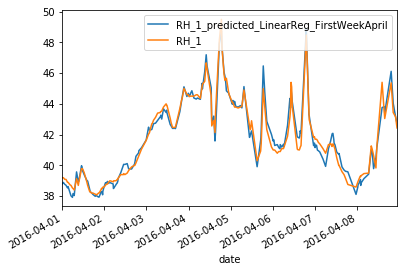

In [215]:
Predicted_DF_linearReg_split_FirstWeekApril = Predicted_DF_linearReg_split.loc["2016-04-01":"2016-04-08",:]
Predicted_DF_linearReg_split_FirstWeekApril.plot()


We can measure the accuracy of our linear regression model for predictions, by comparing it to the Y_test values: mean absolute error (MAE), mean squared error (MSE), R squared (R2)


In [216]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  # we find an average value of error because error varies! look chart!
MAE_linearReg_split= mean_absolute_error(predicted_linearReg_split,Y_test) # function "mean_absolute_error"! MAE
MSE_linearReg_split= mean_squared_error(predicted_linearReg_split,Y_test)  # funtion "mean_squared_error"! MSE
R2_linearReg_split = r2_score(predicted_linearReg_split,Y_test)  # R squared! R2
print("MAE :"+str(MAE_linearReg_split))  
print("MSE :"+ str(MSE_linearReg_split))
print("R2 :"+str(R2_linearReg_split))






MAE :0.46690793290301646
MSE :0.5669816210015548
R2 :0.9425724972312941


## **CROSS VALIDATION !**

First we import it and then we apply it toour linear regression model:

In [0]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV = cross_val_predict(linear_reg, DF_featurs, DF_target, cv=10)  #predictions without time indexes!

In [218]:
# we put our predictions inside a dataframe with time indexes
predicted_DF_linearReg_CV = pd.DataFrame(predict_linearReg_CV,index=DF_target.index, columns=["T1_predicted_linearReg_CV"])
predicted_DF_linearReg_CV.head(24)

,T1_predicted_linearReg_CV
date,
2016-04-01 00:00:00,38.376733
2016-04-01 00:10:00,38.584069
2016-04-01 00:20:00,38.449042
2016-04-01 00:30:00,38.525736
2016-04-01 00:40:00,38.530605
2016-04-01 00:50:00,38.688965
2016-04-01 01:00:00,38.308640
2016-04-01 01:10:00,38.362971
2016-04-01 01:20:00,38.247208


In [219]:
predicted_DF_linearReg_CV = predicted_DF_linearReg_CV.join(DF_target) # again: predicted values together with actual values (DF_target)
predicted_DF_linearReg_CV.head(40)

,T1_predicted_linearReg_CV,RH_1
date,,
2016-04-01 00:00:00,38.376733,39.200000
2016-04-01 00:10:00,38.584069,39.200000
2016-04-01 00:20:00,38.449042,39.200000
2016-04-01 00:30:00,38.525736,39.200000
2016-04-01 00:40:00,38.530605,39.200000
2016-04-01 00:50:00,38.688965,39.200000
2016-04-01 01:00:00,38.308640,39.126667
2016-04-01 01:10:00,38.362971,39.090000
2016-04-01 01:20:00,38.247208,39.090000


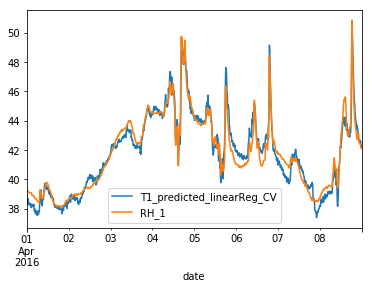

In [220]:
predicted_DF_linearReg_CV_august = predicted_DF_linearReg_CV.loc["2016-04-01":"2016-04-08",:]
predicted_DF_linearReg_CV_august.plot()

Measuring the accuracy of Cross Validation in the same way we did before:

In [221]:
MAE_linearReg_CV= mean_absolute_error(predict_linearReg_CV, DF_target)
MSE_linearReg_CV= mean_squared_error(predict_linearReg_CV,DF_target)
R2_linearReg_CV = r2_score(predict_linearReg_CV,DF_target)
print("MAE :"+str(MAE_linearReg_CV))
print("MSE :"+ str(MSE_linearReg_CV))
print("R2 :"+str(R2_linearReg_CV))

MAE :0.5415125426460088
MSE :0.5780859995610982
R2 :0.943441760348476


Random Forests

In [0]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
predict_RF_Reg_CV = cross_val_predict(RF_reg, DF_featurs, DF_target, cv=10)

                     T1_predicted_linearReg_CV       RH_1
date                                                     
2016-04-01 00:00:00                  39.906000  39.200000
2016-04-01 00:10:00                  39.895333  39.200000
2016-04-01 00:20:00                  39.906000  39.200000
2016-04-01 00:30:00                  39.881667  39.200000
2016-04-01 00:40:00                  39.881667  39.200000
2016-04-01 00:50:00                  39.881667  39.200000
2016-04-01 01:00:00                  39.881667  39.126667
2016-04-01 01:10:00                  39.881667  39.090000
2016-04-01 01:20:00                  40.046000  39.090000
2016-04-01 01:30:00                  40.046000  39.090000
2016-04-01 01:40:00                  40.065333  39.090000
2016-04-01 01:50:00                  40.065333  39.090000
2016-04-01 02:00:00                  40.141667  39.090000
2016-04-01 02:10:00                  40.089333  39.090000
2016-04-01 02:20:00                  40.089333  39.090000
2016-04-01 02:

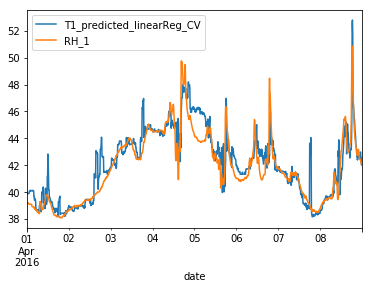

In [223]:
predicted_DF_RF_Reg_CV = pd.DataFrame(predict_RF_Reg_CV,index=DF_target.index, columns=["T1_predicted_linearReg_CV"])
predicted_DF_RF_Reg_CV = predicted_DF_RF_Reg_CV.join(DF_target)
print(predicted_DF_RF_Reg_CV.head(20))
predicted_DF_RF_Reg_CV_august = predicted_DF_RF_Reg_CV.loc["2016-04-01":"2016-04-08",:]
predicted_DF_RF_Reg_CV_august.plot()

In [224]:
MAE_RF_reg_CV= mean_absolute_error(predict_RF_Reg_CV, DF_target)
MSE_RF_reg_CV= mean_squared_error(predict_RF_Reg_CV,DF_target)
R2_RF_reg_CV = r2_score(predict_RF_Reg_CV,DF_target)
print("MAE :"+str(MAE_RF_reg_CV))
print("MSE :"+ str(MSE_RF_reg_CV))
print("R2 :"+str(R2_RF_reg_CV))

MAE :0.8746953124999997
MSE :2.0406358488345564
R2 :0.7712317897401887
